# Symulowane Wyżarzanie
# Sudoku


In [86]:
import numpy as np
from copy import copy
def cost(sudoku):
    cost = 0
    for row in sudoku:
        cost += len(row) - len(set(row))
    for col in sudoku.T:
        cost += len(col) - len(set(col))
    
    for i in range(0,7,3):
        for j in range(0,7,3):
            square = sudoku[i:i+3,j:j+3].reshape(9,)
            cost += len(square) - len(set(square))

    return cost

def swap(sudoku,sudoku_info):
    swapped = copy(sudoku)
    n = swapped.shape[0]
    a = np.random.randint(0,n)
    b = np.random.randint(0,n)
    c = np.random.randint(0,n)

    while b == c or sudoku_info[a,b] or sudoku_info[a,c]:
            a = np.random.randint(0,n)
            b = np.random.randint(0,n)
            c = np.random.randint(0,n)
        
    swapped[a,b], swapped[a,c] = swapped[a,c], swapped[a,b]

    return swapped 

def cool(T,rate):
    return T*rate   

def annealing(sudoku,sudoku_info,T,max_iter,rate):
    T_init = T
    temp = [T]
    costs = [cost(sudoku)]
    for i in range(max_iter):
        new_sudoku = swap(sudoku,sudoku_info)

        old_cost = cost(sudoku)
        new_cost = cost(new_sudoku)
        if new_cost == 0:
            sudoku = new_sudoku
            return sudoku,costs,temp
            
        if new_cost <= old_cost:
            sudoku = new_sudoku
            costs.append(new_cost)
        else:
            if np.random.uniform(0,1) < np.exp((old_cost - new_cost)/T): 
                sudoku = new_sudoku
                costs.append(new_cost)
            else:
                costs.append(old_cost)
        T = cool(T,rate)
        temp.append(T)
        
        if i % (max_iter*0.1) == 0:
            T_init = T_init*0.9
            T = T_init


    return sudoku,costs,temp

In [92]:
%matplotlib notebook
def read_file(filename):
    out = []
    with open(filename,"r") as f:
        txt = f.readlines()
        for line in txt:
            out_line = []
            for char in line:
                if char == ' ' or char == '\n':
                    continue
                if char == 'x':
                    out_line.append(0)
                else:
                    out_line.append(char)
            out.append(out_line)

    
    out = [list(map(int,i)) for i in out]
    sudoku_info = [[True if x != 0 else False for x in row] for row in out]
    
    return np.array(out),np.array(sudoku_info)

def fill_sudoku(sudoku):
    init_sudoku = copy(sudoku)
    n = init_sudoku.shape[0]
    for i in range(n):
        for j in range(n):
            if init_sudoku[i][j] == 0:
                init_sudoku[i][j] = list((set(range(1,10)) - set(init_sudoku[i])))[0]
    return init_sudoku

def test_sudoku(filename,T,max_iter,rate):

    sudoku,sudoku_info = read_file(filename)
    init_sudoku = fill_sudoku(sudoku)
    
    
    after_sudoku,costs,temp = annealing(init_sudoku, sudoku_info, T, max_iter, rate)
    print("Initial sudoku")
    print(sudoku)
    print("Sudoku after annealing")
    print(after_sudoku)
    print("\nInitial cost:",cost(init_sudoku))
    print("Cost after annealing:",cost(after_sudoku))
    
    fig,ax = plt.subplots(2)
    ax[0].plot(costs)
    ax[0].set_title("Cost")
    ax[1].plot(temp)
    ax[1].set_title("Temperature")
    plt.tight_layout()
    plt.show()







Zajmiemy się rozwiązywaniem sudoku za pomoca algorytmu symulowanego wyżarzania. Poniżej przedstawie rozwiązania dla kilku sudoku zaczynając od najprostrzego do najtrudniejszego. Sudoku pochodza ze strony: http://lipas.uwasa.fi/~timan/sudoku/ 

Parametry zostały dobrane eksperymentalnie, niestety nie udało mi się dobrać tak parametrów oraz rodzajów zmiany temperatury żeby algorytm był wstanie rozwiazać sudoku z kosztem równym 0 zwykle koszty końcowe wachają się w okolicy od 2 do 6. Warto dodać że w podejściu które zastosowałem, jeden z wymiarów sudoku (w moim przypadku są to wiersze) jest ustalony tj. jest wypełniany na poczatku odpowiednimi wartościami a następnie zmiany podczas generowania stanów sąsiednich są dokonywane tylko w obrebie wiersza.


Initial sudoku
[[0 0 2 0 0 0 5 0 0]
 [0 1 0 7 0 5 0 2 0]
 [4 0 0 0 9 0 0 0 7]
 [0 4 9 0 0 0 7 3 0]
 [8 0 1 0 3 0 4 0 9]
 [0 3 6 0 0 0 2 1 0]
 [2 0 0 0 8 0 0 0 4]
 [0 8 0 9 0 2 0 6 0]
 [0 0 7 0 0 0 8 0 0]]
Sudoku after annealing
[[9 7 2 3 1 8 5 4 6]
 [6 1 3 7 4 5 9 2 8]
 [4 5 8 2 9 6 3 1 7]
 [5 4 9 8 2 1 7 3 6]
 [8 2 1 6 3 7 4 5 9]
 [7 3 6 4 5 9 2 1 8]
 [2 6 5 1 8 3 7 9 4]
 [3 8 4 9 7 2 1 6 5]
 [1 9 7 5 6 4 8 2 3]]

Initial cost: 60
Cost after annealing: 5


<IPython.core.display.Javascript object>


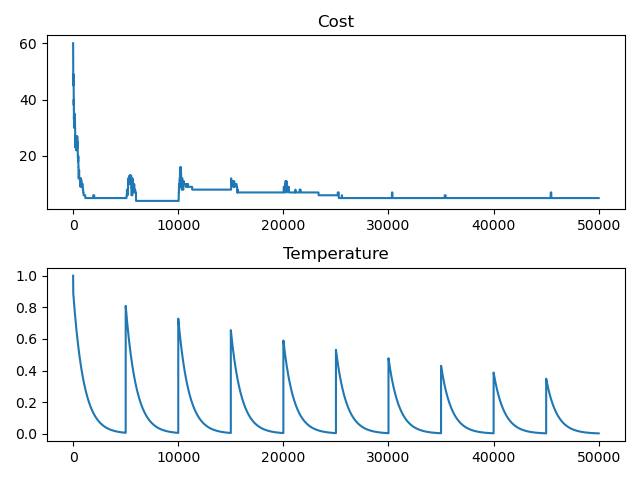

In [93]:
test_sudoku("sudoku1.txt", 1, 50000, 0.999)

Initial sudoku
[[0 0 0 6 0 2 0 0 0]
 [4 0 0 0 5 0 0 0 1]
 [0 8 5 0 1 0 6 2 0]
 [0 3 8 2 0 6 7 1 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 9 4 0 7 3 5 0]
 [0 2 6 0 4 0 5 3 0]
 [9 0 0 0 2 0 0 0 7]
 [0 0 0 8 0 9 0 0 0]]
Sudoku after annealing
[[1 9 3 6 7 2 8 4 5]
 [4 6 2 3 5 8 9 7 1]
 [7 8 5 9 1 4 6 2 3]
 [5 3 8 2 9 6 7 1 4]
 [6 4 7 1 3 5 2 9 8]
 [2 1 9 4 8 7 3 5 6]
 [8 2 6 7 4 1 5 3 9]
 [9 5 4 6 2 3 1 8 7]
 [3 7 1 8 5 9 4 6 2]]

Initial cost: 63
Cost after annealing: 2


<IPython.core.display.Javascript object>


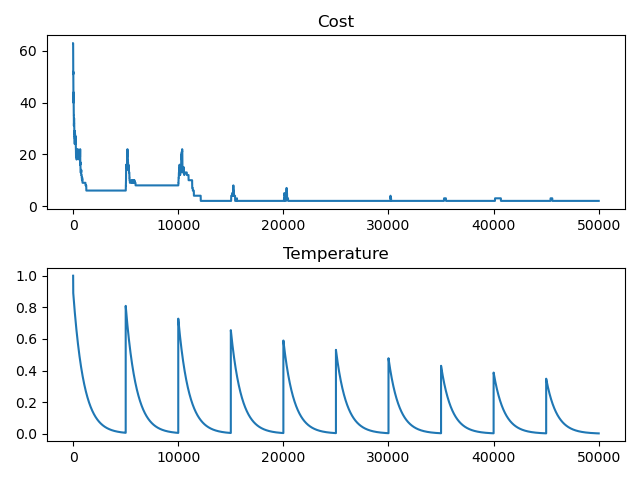

In [94]:
test_sudoku("sudoku2.txt", 1, 50000, 0.999)

Initial sudoku
[[0 0 0 6 0 2 0 0 0]
 [4 0 0 0 5 0 0 0 1]
 [0 8 5 0 1 0 6 2 0]
 [0 3 8 2 0 6 7 1 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 9 4 0 7 3 5 0]
 [0 2 6 0 4 0 5 3 0]
 [9 0 0 0 2 0 0 0 7]
 [0 0 0 8 0 9 0 0 0]]
Sudoku after annealing
[[3 9 1 6 8 2 4 7 5]
 [4 6 2 3 5 7 8 9 1]
 [7 8 5 9 1 4 6 2 3]
 [5 3 8 2 9 6 7 1 4]
 [6 7 4 1 3 5 9 8 2]
 [2 1 9 4 8 7 3 5 6]
 [8 2 6 7 4 1 5 3 9]
 [9 4 3 5 2 8 1 6 7]
 [1 5 7 8 6 9 2 4 3]]

Initial cost: 63
Cost after annealing: 5


<IPython.core.display.Javascript object>


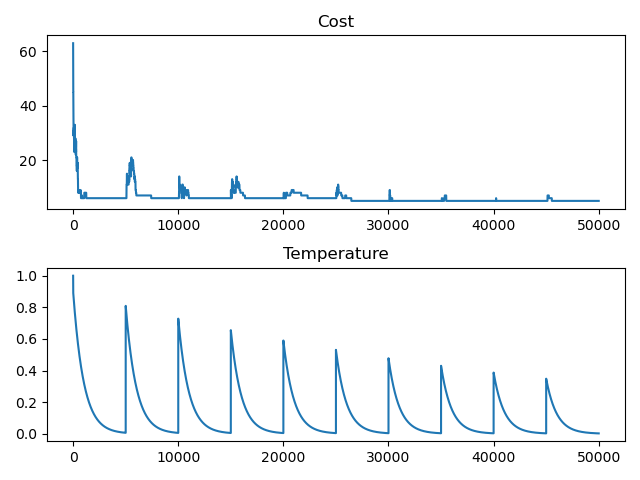

In [95]:
test_sudoku("sudoku3.txt", 1, 50000, 0.999)

Initial sudoku
[[0 0 0 0 0 0 0 0 0]
 [0 7 9 0 5 0 1 8 0]
 [8 0 0 0 0 0 0 0 7]
 [0 0 7 3 0 6 8 0 0]
 [4 5 0 7 0 8 0 9 6]
 [0 0 3 5 0 2 7 0 0]
 [7 0 0 0 0 0 0 0 5]
 [0 1 6 0 3 0 4 2 0]
 [0 0 0 0 0 0 0 0 0]]
Sudoku after annealing
[[3 4 5 1 8 7 2 6 9]
 [6 7 9 2 5 4 1 8 3]
 [8 2 1 9 6 3 5 4 7]
 [1 9 7 3 4 6 8 5 2]
 [4 5 2 7 1 8 3 9 6]
 [8 6 3 5 9 2 7 1 4]
 [7 8 4 6 2 1 9 3 5]
 [5 1 6 8 3 9 4 2 7]
 [2 3 9 4 7 5 6 1 8]]

Initial cost: 59
Cost after annealing: 4


<IPython.core.display.Javascript object>


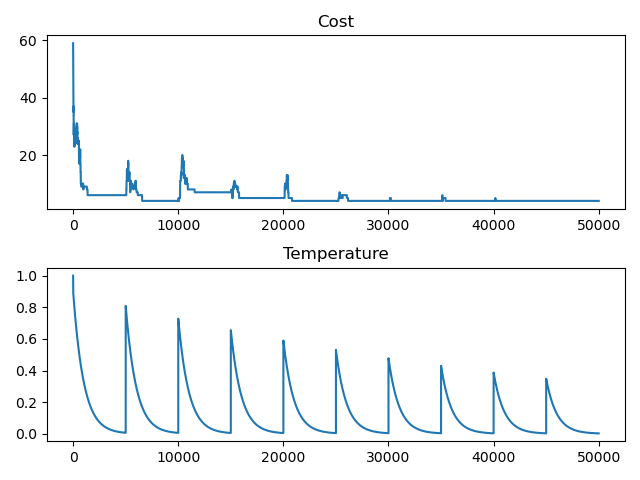

In [96]:
test_sudoku("sudoku4.txt", 1, 50000, 0.999)

Initial sudoku
[[0 0 0 0 0 3 0 1 7]
 [0 1 5 0 0 9 0 0 8]
 [0 6 0 0 0 0 0 0 0]
 [1 0 0 0 0 7 0 0 0]
 [0 0 9 0 0 0 2 0 0]
 [0 0 0 5 0 0 0 0 4]
 [0 0 0 0 0 0 0 2 0]
 [5 0 0 6 0 0 3 4 0]
 [3 4 0 2 0 0 0 0 0]]
Sudoku after annealing
[[2 8 4 5 6 3 9 1 7]
 [3 1 5 7 2 9 4 6 8]
 [9 6 7 8 1 4 5 3 2]
 [1 5 2 9 4 7 6 8 3]
 [8 4 9 1 3 6 2 7 5]
 [6 7 3 5 8 2 1 9 4]
 [7 9 1 4 3 5 8 2 6]
 [5 2 8 6 7 1 3 4 9]
 [3 4 6 2 9 8 7 5 1]]

Initial cost: 68
Cost after annealing: 4


<IPython.core.display.Javascript object>


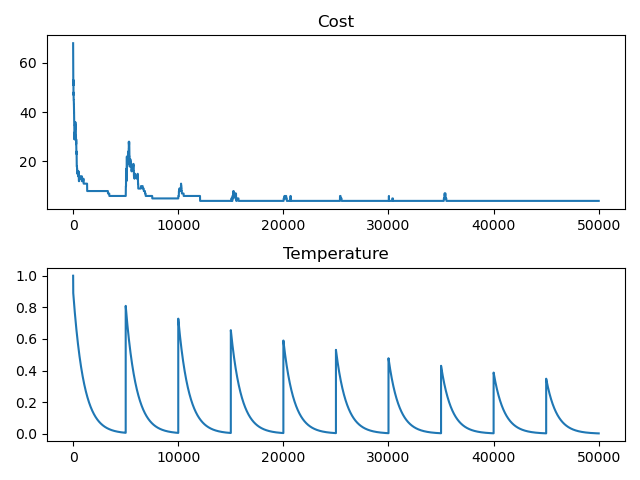

In [97]:
test_sudoku("sudoku5.txt", 1, 50000, 0.999)